In [34]:
import numpy as np
import matplotlib.pyplot as plt
import requests
from sklearn.cluster import KMeans
from sklearn import preprocessing

rc = {"font.family" : "serif", 
      "mathtext.fontset" : "cm",
      "font.size" : "12",
      "figure.figsize" : [8,8]}
plt.rcParams.update(rc)

%config InlineBackend.figure_format='retina'

In [4]:
# Download file
r = requests.get('https://user-web.icecube.wisc.edu/~grbweb_public/Summary_table.txt')
with open("Summary_table.txt", 'wb') as f:
    f.write(r.content)

# Read content
data = np.loadtxt("Summary_table.txt", dtype='str',unpack='True')

# Read headers
with open("Summary_table.txt",'r') as f:
    names= np.array([n.strip().replace(" ","_") for n in f.readlines()[1].replace("#","").replace("\n","").lstrip().split('    ') if n.strip()!=''])

In [7]:
print(names)

['GRB_name' 'GRB_name_Fermi' 'T0' 'ra' 'decl' 'pos_error' 'T90'
 'T90_error' 'T90_start' 'fluence' 'fluence_error' 'redshift' "'T100'"
 'GBM_located' 'mjd_(T0)']


In [12]:
print(data.shape)

(15, 7803)


## ra-dec

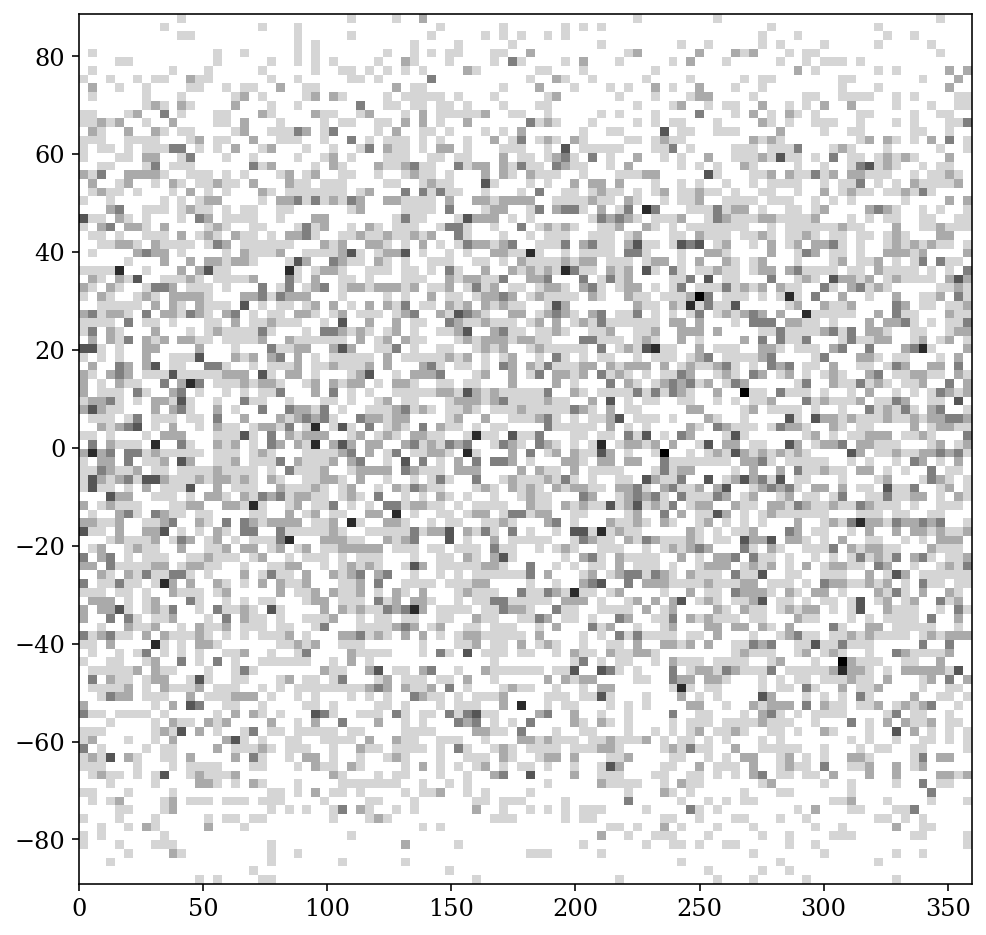

In [26]:
ra = data[3].astype(float)
dec = data[4].astype(float)
#plt.scatter(ra, dec, c = 'k', alpha = 0.3)
plt.hist2d(ra, dec, bins = 100, cmap = 'binary')
plt.show()

no clusters? check with a uniform distribution

## T90-fluence

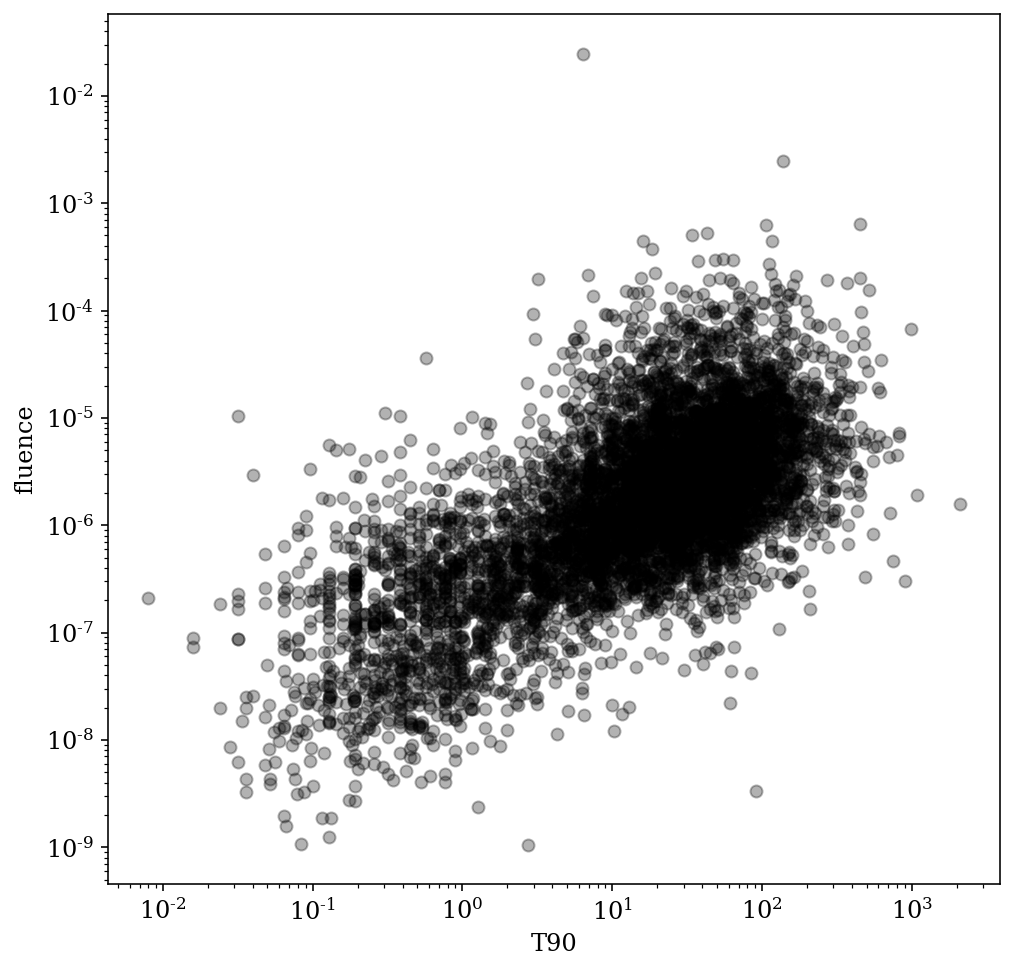

In [103]:
T90 = data[6].astype(float)
fluence = data[9].astype(float)

mask = (T90 > 0) & (fluence > 0)
#mask = (T90 > -999) & (fluence > -999)

plt.scatter(T90[mask], fluence[mask], c = 'k', alpha = 0.3)

plt.xlabel('T90')
plt.ylabel('fluence')
plt.loglog()
plt.show()

### check for clusters:

In [106]:
# K means with 2 clusters
n_clusters = 2
clf = KMeans(n_clusters = n_clusters)

X = np.vstack([np.log(T90[mask]), np.log(fluence[mask])]).T #right shape for the fit module
clf.fit(X)
centers = clf.cluster_centers_ 
labels = clf.predict(X)

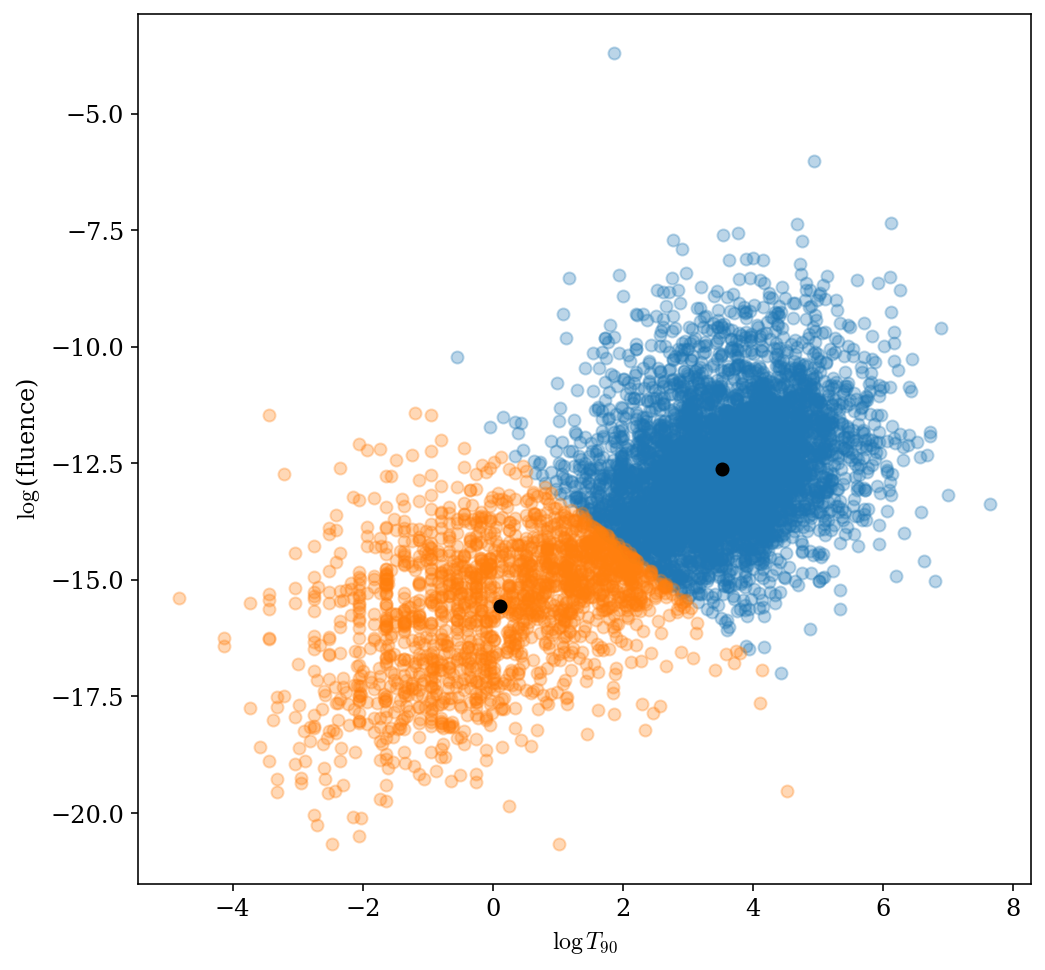

In [111]:
plt.figure()
for i in range(n_clusters):
    plt.scatter(X[labels == i, 0], X[labels == i, 1], alpha = 0.3)
plt.scatter(centers[:, 0], centers[:, 1], c='k')

plt.xlabel(r'$\logT_{90}$')
plt.ylabel(r'$\log$(fluence)')

#plt.loglog()
plt.show()